In [1]:
!pip3 install pymysql
!pip3 install ipython-sql
!pip3 install mysqlclient


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
db_name = 'sales'
db_host = 'localhost'
db_username = 'root'
db_password = 'Akash@7865'



In [4]:
try:
    conn = pymysql.connect(host = db_host,
                           port = int(3306),
                           user = 'root',
                           password = db_password,
                           db = db_name)
except e:
    print(e)

In [5]:
if conn:
    print('sucessfully connected')
else:
    print('error')
    

sucessfully connected


In [6]:
df = pd.read_sql_query("select * from customers",conn)

C:\Users\gupta\AppData\Local\Temp\ipykernel_16252\2662584602.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("select * from customers",conn)


In [7]:
df

,customer_code,custmer_name,customer_type
0,Cus001,Surge Stores,Brick & Mortar
1,Cus002,Nomad Stores,Brick & Mortar
2,Cus003,Excel Stores,Brick & Mortar
3,Cus004,Surface Stores,Brick & Mortar
4,Cus005,Premium Stores,Brick & Mortar
5,Cus006,Electricalsara Stores,Brick & Mortar
6,Cus007,Info Stores,Brick & Mortar
7,Cus008,Acclaimed Stores,Brick & Mortar
8,Cus009,Electricalsquipo Stores,Brick & Mortar
9,Cus010,Atlas Stores,Brick & Mortar


In [8]:
product_df = pd.read_sql_query('select * from products',conn)

C:\Users\gupta\AppData\Local\Temp\ipykernel_16252\1638311343.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  product_df = pd.read_sql_query('select * from products',conn)


In [9]:
product_df

,product_code,product_type
0,Prod001,Own Brand\r
1,Prod002,Own Brand\r
2,Prod003,Own Brand\r
3,Prod004,Own Brand\r
4,Prod005,Own Brand\r
...,...,...
274,Prod275,Own Brand\r
275,Prod276,Own Brand\r
276,Prod277,Own Brand\r
277,Prod278,Distribution\r


In [10]:
df_transaction = pd.read_sql_query('select * from transactions',conn)

C:\Users\gupta\AppData\Local\Temp\ipykernel_16252\3343001279.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_transaction = pd.read_sql_query('select * from transactions',conn)


In [11]:
df_transaction

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.0,INR
1,Prod001,Cus002,Mark002,2018-05-08,3,-1.0,INR
2,Prod002,Cus003,Mark003,2018-04-06,1,875.0,INR
3,Prod002,Cus003,Mark003,2018-04-11,1,583.0,INR
4,Prod002,Cus004,Mark003,2018-06-18,6,7176.0,INR
...,...,...,...,...,...,...,...
150278,Prod339,Cus005,Mark004,2019-04-18,1,394.0,INR\r
150279,Prod339,Cus020,Mark004,2019-04-23,1,667.0,INR\r
150280,Prod339,Cus007,Mark004,2019-04-23,1,625.0,INR\r
150281,Prod339,Cus006,Mark004,2019-04-24,7,8625.0,INR\r


In [12]:
total_sales_qty = df_transaction.sales_qty.sum()

In [13]:
total_sales_qty

2444415

In [14]:
df_transaction['date'] = pd.to_datetime(df_transaction.order_date)
df_transaction

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,date
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.0,INR,2017-10-10
1,Prod001,Cus002,Mark002,2018-05-08,3,-1.0,INR,2018-05-08
2,Prod002,Cus003,Mark003,2018-04-06,1,875.0,INR,2018-04-06
3,Prod002,Cus003,Mark003,2018-04-11,1,583.0,INR,2018-04-11
4,Prod002,Cus004,Mark003,2018-06-18,6,7176.0,INR,2018-06-18
...,...,...,...,...,...,...,...,...
150278,Prod339,Cus005,Mark004,2019-04-18,1,394.0,INR\r,2019-04-18
150279,Prod339,Cus020,Mark004,2019-04-23,1,667.0,INR\r,2019-04-23
150280,Prod339,Cus007,Mark004,2019-04-23,1,625.0,INR\r,2019-04-23
150281,Prod339,Cus006,Mark004,2019-04-24,7,8625.0,INR\r,2019-04-24


In [15]:
df_transaction['days'] = pd.DatetimeIndex(df_transaction.date).day
df_transaction

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,date,days
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.0,INR,2017-10-10,10
1,Prod001,Cus002,Mark002,2018-05-08,3,-1.0,INR,2018-05-08,8
2,Prod002,Cus003,Mark003,2018-04-06,1,875.0,INR,2018-04-06,6
3,Prod002,Cus003,Mark003,2018-04-11,1,583.0,INR,2018-04-11,11
4,Prod002,Cus004,Mark003,2018-06-18,6,7176.0,INR,2018-06-18,18
...,...,...,...,...,...,...,...,...,...
150278,Prod339,Cus005,Mark004,2019-04-18,1,394.0,INR\r,2019-04-18,18
150279,Prod339,Cus020,Mark004,2019-04-23,1,667.0,INR\r,2019-04-23,23
150280,Prod339,Cus007,Mark004,2019-04-23,1,625.0,INR\r,2019-04-23,23
150281,Prod339,Cus006,Mark004,2019-04-24,7,8625.0,INR\r,2019-04-24,24


In [16]:
df_transaction['months'] = pd.DatetimeIndex(df_transaction.date).month
df_transaction

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,date,days,months
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.0,INR,2017-10-10,10,10
1,Prod001,Cus002,Mark002,2018-05-08,3,-1.0,INR,2018-05-08,8,5
2,Prod002,Cus003,Mark003,2018-04-06,1,875.0,INR,2018-04-06,6,4
3,Prod002,Cus003,Mark003,2018-04-11,1,583.0,INR,2018-04-11,11,4
4,Prod002,Cus004,Mark003,2018-06-18,6,7176.0,INR,2018-06-18,18,6
...,...,...,...,...,...,...,...,...,...,...
150278,Prod339,Cus005,Mark004,2019-04-18,1,394.0,INR\r,2019-04-18,18,4
150279,Prod339,Cus020,Mark004,2019-04-23,1,667.0,INR\r,2019-04-23,23,4
150280,Prod339,Cus007,Mark004,2019-04-23,1,625.0,INR\r,2019-04-23,23,4
150281,Prod339,Cus006,Mark004,2019-04-24,7,8625.0,INR\r,2019-04-24,24,4


In [17]:
df_transaction['year'] = pd.DatetimeIndex(df_transaction.date).year
df_transaction

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,date,days,months,year
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.0,INR,2017-10-10,10,10,2017
1,Prod001,Cus002,Mark002,2018-05-08,3,-1.0,INR,2018-05-08,8,5,2018
2,Prod002,Cus003,Mark003,2018-04-06,1,875.0,INR,2018-04-06,6,4,2018
3,Prod002,Cus003,Mark003,2018-04-11,1,583.0,INR,2018-04-11,11,4,2018
4,Prod002,Cus004,Mark003,2018-06-18,6,7176.0,INR,2018-06-18,18,6,2018
...,...,...,...,...,...,...,...,...,...,...,...
150278,Prod339,Cus005,Mark004,2019-04-18,1,394.0,INR\r,2019-04-18,18,4,2019
150279,Prod339,Cus020,Mark004,2019-04-23,1,667.0,INR\r,2019-04-23,23,4,2019
150280,Prod339,Cus007,Mark004,2019-04-23,1,625.0,INR\r,2019-04-23,23,4,2019
150281,Prod339,Cus006,Mark004,2019-04-24,7,8625.0,INR\r,2019-04-24,24,4,2019


In [22]:
df_transaction.sort_values(['days','months'],inplace = True,ascending = [True,True])
df_transaction

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,date,days,months,year
6058,Prod053,Cus017,Mark011,2018-01-01,3,731.0,INR\r,2018-01-01,1,1,2018
6059,Prod053,Cus024,Mark011,2018-01-01,1,347.0,INR\r,2018-01-01,1,1,2018
6060,Prod053,Cus022,Mark011,2018-01-01,1,213.0,INR\r,2018-01-01,1,1,2018
17261,Prod065,Cus024,Mark011,2018-01-01,1,417.0,INR\r,2018-01-01,1,1,2018
49697,Prod134,Cus024,Mark011,2018-01-01,1,148.0,INR\r,2018-01-01,1,1,2018
...,...,...,...,...,...,...,...,...,...,...,...
146915,Prod334,Cus037,Mark007,2019-12-31,1,894.0,INR\r,2019-12-31,31,12,2019
146916,Prod334,Cus002,Mark007,2019-12-31,1,1819.0,INR\r,2019-12-31,31,12,2019
146917,Prod334,Cus035,Mark007,2019-12-31,1,787.0,INR\r,2019-12-31,31,12,2019
149249,Prod337,Cus036,Mark007,2019-12-31,2,4426.0,INR\r,2019-12-31,31,12,2019


In [23]:
sales_per_year = df_transaction.groupby('year')[['sales_qty','sales_amount']].sum()
sales_per_year    ## this data indicate that maximum quantity sell in 2018 that is more than 10 lakh and the amount is 41.43 crore.In 2017 and 2020 sales quantity is less than average sales quantity.

,sales_qty,sales_amount
year,,
2017,237505,93569152.0
2018,1002284,414308941.0
2019,852422,336452114.0
2020,352204,142235559.0


In [24]:
avg_sales_per_year = sales_per_year.sales_qty.mean()
avg_sales_per_year

611103.75

In [25]:
sales_in_2017 = df_transaction[df_transaction.year == 2017].groupby('months')[['sales_qty','sales_amount']].sum()
sales_in_2017       ### In 2017 the maximum number of sales quantity was in the month of November.

,sales_qty,sales_amount
months,,
10,67179,26349356.0
11,90611,35385889.0
12,79715,31833907.0


In [26]:
dates = pd.date_range(start = '2017-10',end = '2018-01',freq = 'M')
dates


DatetimeIndex(['2017-10-31', '2017-11-30', '2017-12-31'], dtype='datetime64[ns]', freq='M')

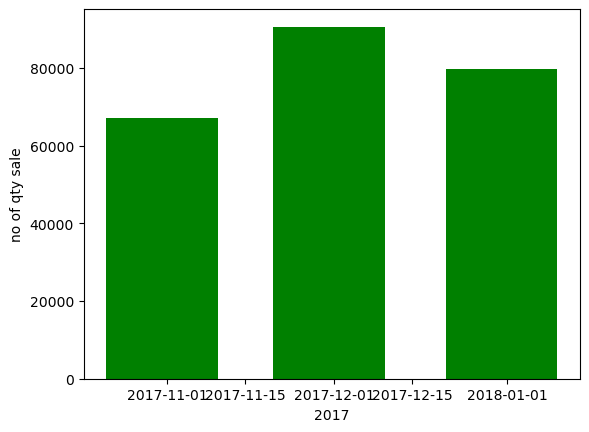

In [32]:
plt.bar(dates,sales_in_2017['sales_qty'],color = 'green',label = 'Bars 1',align = 'center',width = 20)
plt.xlabel('2017')
plt.ylabel('no of qty sale');

In [29]:
sales_in_2018 = df_transaction[df_transaction.year == 2018].groupby('months')[['sales_qty','sales_amount']].sum()
sales_in_2018

,sales_qty,sales_amount
months,,
1,88574,42521659.0
2,88356,35258929.0
3,90880,38169872.0
4,91723,35919198.0
5,92767,32273882.0
6,87190,34925537.0
7,88581,36228538.0
8,91937,39459625.0
9,67714,30102531.0


In [30]:
sales_in_2019 = df_transaction[df_transaction.year == 2019].groupby('months')[['sales_qty','sales_amount']].sum()
sales_in_2019

,sales_qty,sales_amount
months,,
1,76514,31531844.0
2,59305,27189432.0
3,68521,28224398.0
4,67715,27654680.0
5,69383,28050701.0
6,59707,25418299.0
7,84729,35192282.0
8,90864,32212074.0
9,74518,25061571.0
